## Challenge 4.3.6: Make Your Network  
## Kevin Hahn  

After some attempts to practice multi-layer perceptron methods on large datasets, I decided to apply my learning on a much smaller dataset, Gorman and Sejnowski's Sonar dataset which classifies sonar signlas bounced off a metal cylinder and those bounced off an approximately cylindrial rock. This dataset has 208 observations with 60 different frequency chirps and 1 label as either Rock or Mine.  

I built a MLP Classifier from scratch with the help of a guide as well as through the MLPClassifier method in SKLearn. With a three-layered perceptron consisting of 1000, 30, and 10 nodes each, the MLP Classifier model found an accuracy rating of 0.8702. Testing this model using a training set (80%) to predict values of a validation set (20%) similarly found an accuracy rating of 0.8810. However, when changing the random_state parameter of the MLP Classifier, the performance of the model seemed to vary considerably.

From there I decided to build and iterate upon supervised learning and boosting models as a comparison. After ensembling several methods together, I decided to keep the Decision Tree, Random Forest, Ada Boosting, Gradient Boosting, Extra Trees, and Multi-Layer Perceptron Classifier models and run each with 10 KFolds. Tuning the hyperparameters Decision Tree and Random Forest models helped decrease the variability of the accuracy ratings they each reported, and I threw in the less familiar Ada Boosting and Gradient Boosting methods just for fun.  

Interestingly, the computational complexity of the Random Forest Classifier seemed to be the highest and took the most time. I suspect that if this were a much larger dataset (e.g., far more observation rows), MLP would take even longer than Random Forest.  

While the MLP Classifier did have the one highest accuracy rating, the method's variability had the largest range compared to the other methods. Random Forest, however, had the least amount of variability and similar median accuracy rating to MLP. AdaBoost had the highest median accuracy and similar variability in its accruacy ratings when compared to Decision Tree, Gradient Boosting, and Extra Trees Classifier methods.  

The next two cells in this notebook consist of the deliverables I'm proudest of for this challenge: first, the boxplot of each of the models' average performance when implemented 10 times each, and second, the conditional logic I used to test for accuracy of the MLP built by the training data on a separate hold-out validation set.

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


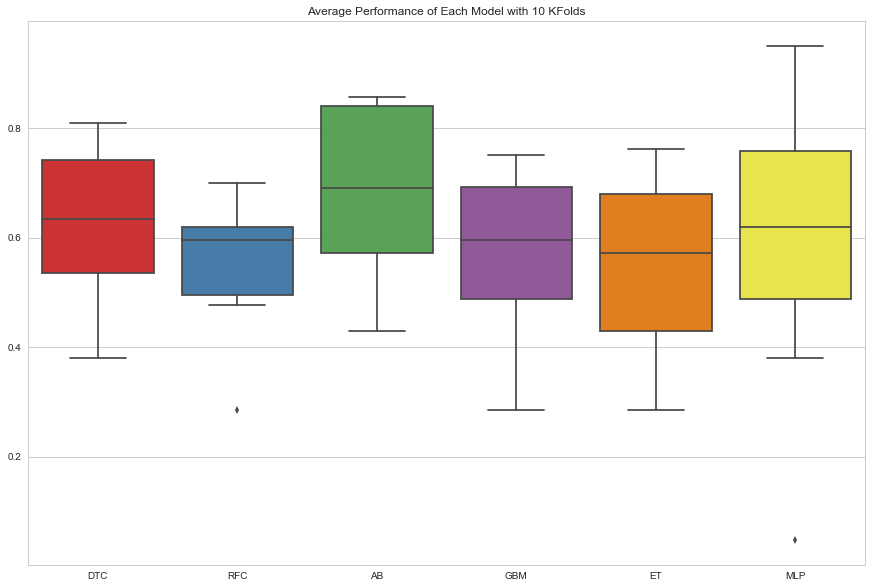

In [193]:
###Figure 1

# boxplot algorithm comparison
plt.figure(figsize=(15, 10))
plt.title("Average Performance of Each Model with 10 KFolds")
sns.set_style(style="whitegrid")
initial = sns.boxplot(data=results, palette='Set1', notch=False)
initial.set_xticklabels(['DTC','RFC','AB','GBM','ET','MLP'])
initial.legend()

In [201]:
### Testing Training vs. Validation sets in predicting accuracy

#checking accuracy of mlp on predicting correct Rock or Mine
mlp = MLPClassifier(hidden_layer_sizes=(1000, 30, 10),
                    tol=0.001,
                    learning_rate_init=0.001,                    
                    random_state=99)
mlp.fit(X_train, Y_train)

#using the training set to model to predict on validation set
accuracy = 0
correct = 0
total = 0
i = 0

for row in X_validation:
    guess = mlp.predict(row.reshape(1,-1))
    if guess[0] == Y_validation[i]:
        correct += 1
    i += 1
    total += 1
accuracy = correct / total
print(accuracy)

0.8809523809523809


In [194]:
#importing required packages
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataframe = pandas.read_csv("~/Documents/sonar.all-data", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# Y = Y.apply(lambda x: 1 if x == 'M' else 0)

In [127]:
dataframe.shape

(208, 61)

In [10]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [13]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [14]:
# baseline model
def create_baseline():
    
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, nb_epoch=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 76.35% (8.12%)


In [16]:
# evaluate baseline model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 84.11% (4.36%)


In [17]:
# smaller model
def create_smaller():
    
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 85.06% (5.58%)


In [18]:
# larger model
def create_larger():
    
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 85.52% (5.36%)


In [43]:
dataframe.shape

(208, 61)

In [199]:
# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with three layers of 1000, 30, and 10 nodes each.
mlp = MLPClassifier(hidden_layer_sizes=(1000, 30, 10),
                    tol=0.001,
                    learning_rate_init=0.001,                    
                    random_state=99)
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 30, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=99, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [200]:
mlp.score(X, Y)

0.87019230769230771

In [176]:
print(correct)
print(total)

38
42


In [182]:
#checking accuracy of mlp on predicting correct Rock or Mine
mlp = MLPClassifier(hidden_layer_sizes=(1000, 30, 10),
                    tol=0.001,
                    learning_rate_init=0.001,                    
                    random_state=99)
mlp.fit(X_train, Y_train)

#using the training set to model to predict on validation set
accuracy = 0
correct = 0
total = 0
i = 0

for row in X_validation:
    guess = mlp.predict(row.reshape(1,-1))
    if guess[0] == Y_validation[i]:
        correct += 1
    i += 1
    total += 1
accuracy = correct / total
print(accuracy)

0.8809523809523809


In [145]:
X[0]

array([ 0.02  ,  0.0371,  0.0428,  0.0207,  0.0954,  0.0986,  0.1539,
        0.1601,  0.3109,  0.2111,  0.1609,  0.1582,  0.2238,  0.0645,
        0.066 ,  0.2273,  0.31  ,  0.2999,  0.5078,  0.4797,  0.5783,
        0.5071,  0.4328,  0.555 ,  0.6711,  0.6415,  0.7104,  0.808 ,
        0.6791,  0.3857,  0.1307,  0.2604,  0.5121,  0.7547,  0.8537,
        0.8507,  0.6692,  0.6097,  0.4943,  0.2744,  0.051 ,  0.2834,
        0.2825,  0.4256,  0.2641,  0.1386,  0.1051,  0.1343,  0.0383,
        0.0324,  0.0232,  0.0027,  0.0065,  0.0159,  0.0072,  0.0167,
        0.018 ,  0.0084,  0.009 ,  0.0032])

In [62]:
mlp = MLPClassifier(hidden_layer_sizes=(60, 30, 5),
                   random_state=99)
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 30, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=99, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [63]:
mlp.score(X, Y)

0.79807692307692313

In [66]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [68]:
##Import All Required Packages

#The Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Decision Tree Classifier
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

#Random Forest Classifier
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

#Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB

#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

#SVM Classifier
from sklearn.svm import SVC

#Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot # delete??
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

#Stochastic Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingClassifier

#Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier

#Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

#Randomized for Algorithm Tuning
import numpy
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

#Confusion Matrix and Accuracy Report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

DTC: 0.620714 (0.137775)
RFC: 0.558333 (0.114421)
AB: 0.684286 (0.147754)
GBM: 0.568810 (0.144688)
ET: 0.573333 (0.174164)
MLP: 0.589048 (0.239943)


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


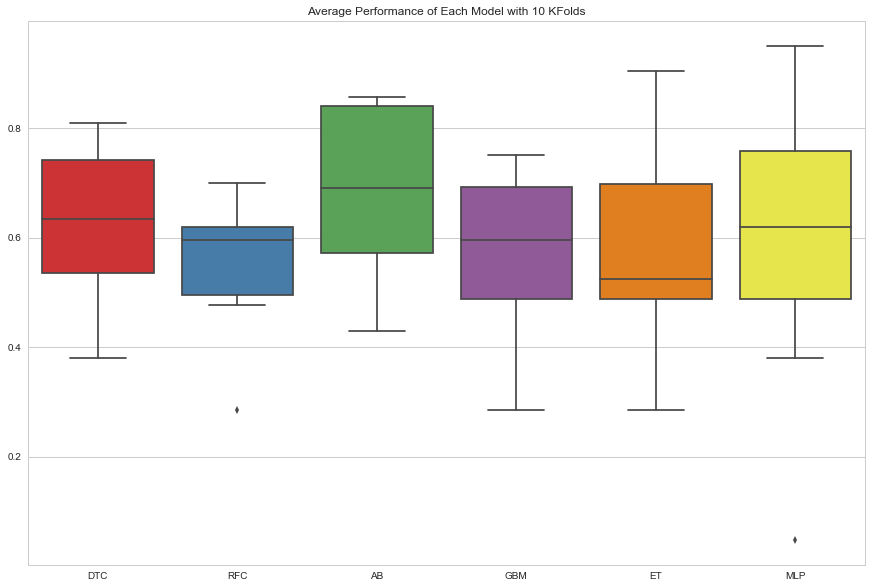

In [204]:
# load dataset
X = X
Y = Y

# prepare models    --- pared down to supervised methods that seem to work better, boosting models, and MLP
models = []
models.append(('DTC', DecisionTreeClassifier(criterion="entropy",
                                             max_features='auto',
                                             max_depth=None,
                                             random_state=99
                                        )))
models.append(('RFC', RandomForestClassifier(n_estimators=1000,
    criterion='entropy',
    max_features='auto',
    max_depth=None,
    random_state=99)))
models.append(('AB', AdaBoostClassifier(random_state=99))) 
models.append(('GBM', GradientBoostingClassifier(random_state=99))) 
models.append(('ET', ExtraTreesClassifier(random_state=99))) 
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(1000, 30, 10),
                    tol=0.001,
                    learning_rate_init=0.001,                    
                    random_state=99)))

# evaluate each type of classifier model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=27)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
    
# boxplot algorithm comparison
plt.figure(figsize=(15, 10))
plt.title("Average Performance of Each Model with 10 KFolds")
sns.set_style(style="whitegrid")
initial = sns.boxplot(data=results, palette='Set1', notch=False)
initial.set_xticklabels(['DTC','RFC','AB','GBM','ET','MLP'])
initial.legend()

In [71]:
dataframe.head(12)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [130]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=0.20, random_state=99)

AB: 0.772059 (0.093962)
GBM: 0.790809 (0.133486)
RF: 0.717279 (0.105528)
ET: 0.777206 (0.154037)


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


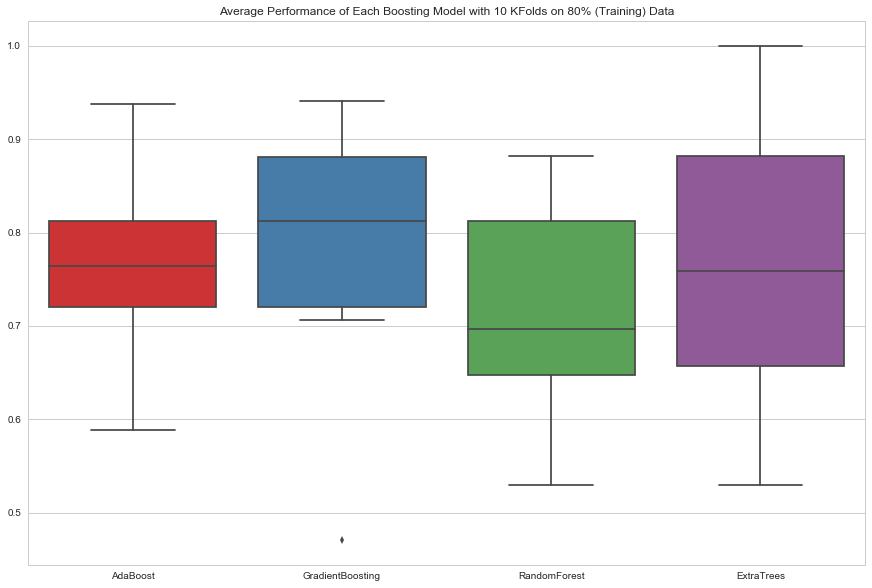

In [136]:
## Boosting

# Boosting Method ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier())) 
ensembles.append(('ET', ExtraTreesClassifier())) 
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
    
# Compare Algorithms
plt.figure(figsize=(15, 10))
plt.title("Average Performance of Each Boosting Model with 10 KFolds on 80% (Training) Data")
sns.set_style(style="whitegrid")
g = sns.boxplot(data=results, palette='Set1', notch=False)
# g.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])
g.set_xticklabels(['AdaBoost','GradientBoosting','RandomForest','ExtraTrees'])
g.legend()

In [126]:



### Clean up the RFC/other non-unsupervised methods and compare against MLP/Keras UL methods

### Look into boosting of RFC, ADABoost, DTC -- compare with Unsupervised methods

###  



In [ ]:
####### Pipeline as the process from where the data were/are scraped/gathered to the actual tools to cleanse/wrangle and eventually model the data, etc.
### Getting data from origin to polished/used in model
### 